In [3]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
df=pd.read_csv('/content/drive/MyDrive/windata.csv')

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Speed,Direction,Temperature,Pressure
0,1979-01-01 00:00:00,8.34,34.0,24.8,101.2
1,1979-01-01 01:00:00,8.25,34.9,24.8,101.3
2,1979-01-01 02:00:00,8.07,33.7,24.9,101.4
3,1979-01-01 03:00:00,8.14,33.3,25.0,101.4
4,1979-01-01 04:00:00,8.50,33.4,25.2,101.5
...,...,...,...,...,...
374731,2021-09-30 19:00:00,4.23,203.1,27.2,100.9
374732,2021-09-30 20:00:00,3.60,228.1,26.5,100.9
374733,2021-09-30 21:00:00,1.98,209.0,26.1,100.8
374734,2021-09-30 22:00:00,0.99,290.6,25.7,100.7


In [6]:
df1=df.drop(columns=['Direction','Temperature','Pressure'])
df1

,Date,Speed
0,1979-01-01 00:00:00,8.34
1,1979-01-01 01:00:00,8.25
2,1979-01-01 02:00:00,8.07
3,1979-01-01 03:00:00,8.14
4,1979-01-01 04:00:00,8.50
...,...,...
374731,2021-09-30 19:00:00,4.23
374732,2021-09-30 20:00:00,3.60
374733,2021-09-30 21:00:00,1.98
374734,2021-09-30 22:00:00,0.99


In [7]:
df2=df1[df1['Date']<='1984-12-31 23:00:00']
df2

,Date,Speed
0,1979-01-01 00:00:00,8.34
1,1979-01-01 01:00:00,8.25
2,1979-01-01 02:00:00,8.07
3,1979-01-01 03:00:00,8.14
4,1979-01-01 04:00:00,8.50
...,...,...
52603,1984-12-31 19:00:00,5.36
52604,1984-12-31 20:00:00,5.15
52605,1984-12-31 21:00:00,4.79
52606,1984-12-31 22:00:00,4.70


In [8]:
df2.tail

<bound method NDFrame.tail of                      Date  Speed
0     1979-01-01 00:00:00   8.34
1     1979-01-01 01:00:00   8.25
2     1979-01-01 02:00:00   8.07
3     1979-01-01 03:00:00   8.14
4     1979-01-01 04:00:00   8.50
...                   ...    ...
52603 1984-12-31 19:00:00   5.36
52604 1984-12-31 20:00:00   5.15
52605 1984-12-31 21:00:00   4.79
52606 1984-12-31 22:00:00   4.70
52607 1984-12-31 23:00:00   4.92

[52608 rows x 2 columns]>

In [9]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52608 entries, 0 to 52607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    52608 non-null  datetime64[ns]
 1   Speed   52608 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB
None


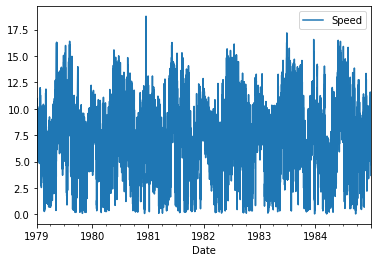

In [10]:
df2.plot(x='Date')

In [11]:
df3=df2.drop(columns='Date')
df3

,Speed
0,8.34
1,8.25
2,8.07
3,8.14
4,8.50
...,...
52603,5.36
52604,5.15
52605,4.79
52606,4.70


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [13]:
training_size=int(len(df3)*0.70)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df3),:1]

In [14]:
training_size,test_size


(36825, 15783)

In [15]:
  train_data

array([[0.44313935],
       [0.43833422],
       [0.42872397],
       ...,
       [0.21195942],
       [0.22957822],
       [0.26161239]])

In [16]:
#converting an arrayof values into a dataset matrix

def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [17]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)

In [18]:
print(X_train.shape), print(y_train.shape)


(36724, 100)
(36724,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
574/574 [==============================] - 110s 182ms/step - loss: 0.0059 - val_loss: 0.0022
Epoch 2/100
574/574 [==============================] - 105s 183ms/step - loss: 0.0011 - val_loss: 6.8678e-04
Epoch 3/100
574/574 [==============================] - 105s 183ms/step - loss: 6.1284e-04 - val_loss: 6.9443e-04
Epoch 4/100
574/574 [==============================] - 105s 183ms/step - loss: 5.8014e-04 - val_loss: 6.0775e-04
Epoch 5/100
574/574 [==============================] - 104s 182ms/step - loss: 5.7282e-04 - val_loss: 6.8062e-04
Epoch 6/100
574/574 [==============================] - 104s 182ms/step - loss: 5.7603e-04 - val_loss: 6.4278e-04
Epoch 7/100
574/574 [==============================] - 105s 182ms/step - loss: 5.6107e-04 - val_loss: 7.2441e-04
Epoch 8/100
574/574 [==============================] - 105s 183ms/step - loss: 5.7599e-04 - val_loss: 6.0704e-04
Epoch 9/100
574/574 [==============================] - 105s 183ms/step - loss: 5.6073e-04 - val_loss: 6.1697

In [25]:
#prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [37]:
train_predict

array([[8.534323 ],
       [8.676596 ],
       [8.411414 ],
       ...,
       [3.7746239],
       [3.833323 ],
       [4.270089 ]], dtype=float32)

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7.4380446177074715

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

7.634585236431014

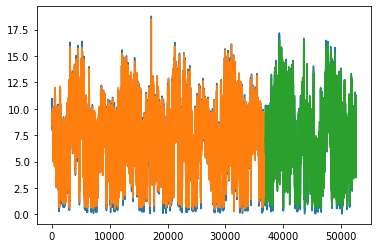

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df3)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

15783

In [31]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 15442)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.4687666844634276,
 0.4741057127602776,
 0.4799786438868125,
 0.47517351841964756,
 0.4639615589962626,
 0.4388681260010677,
 0.40683395621996793,
 0.381206620395088,
 0.3272824345969033,
 0.3272824345969033,
 0.3352909770421783,
 0.3272824345969033,
 0.2931126534970635,
 0.26107848371596365,
 0.2343833422317138,
 0.20234917245061398,
 0.1729845168179391,
 0.15429791777896423,
 0.13240790176187933,
 0.10891617725573945,
 0.09343299519487452,
 0.08809396689802455,
 0.06567004805125466,
 0.020822210357714893,
 0.07474639615589962,
 0.13080619327282436,
 0.1831286705819541,
 0.22904431393486385,
 0.25947677522690865,
 0.2669514148424986,
 0.25840896956753867,
 0.2381206620395088,
 0.22690870261612386,
 0.2124933262146289,
 0.20715429791777895,
 0.21142552055525893,
 0.22210357714895887,
 0.24773091297383873,
 0.27068873465029364,
 0.2685531233315536,
 0.2568072610784837,
 0.23384943940202882,
 0.23117992525360384,
 0.26001067805659367,
 0.3240790176187933,
 0.390282968499733,
 0.4378003

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):#predicting for next 30 days
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # weare adding the yhat value to lst
        i=i+1
  

print(lst_output)

0 day input [0.47410571 0.47997864 0.47517352 ... 0.25360384 0.24879872 0.26054458]


ValueError: ignored